# *Simple Linear Regression*
   2)  Salary_hike -> Build a prediction model for Salary_hike

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Dataset
df=pd.read_csv(r"C:\Users\Rustham Sorab\Desktop\Data Science\4.Simple Linear Regression\Raw Data\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# *EDA and Visualization*

In [3]:

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
len (df)

30

In [5]:
df.ndim

2

In [6]:
df.shape

(30, 2)

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [12]:
df.duplicated().sum()

0

In [13]:
 df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [14]:
df.columns=("YearsExp","Salary")
df.head()

,YearsExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExp', ylabel='Density'>

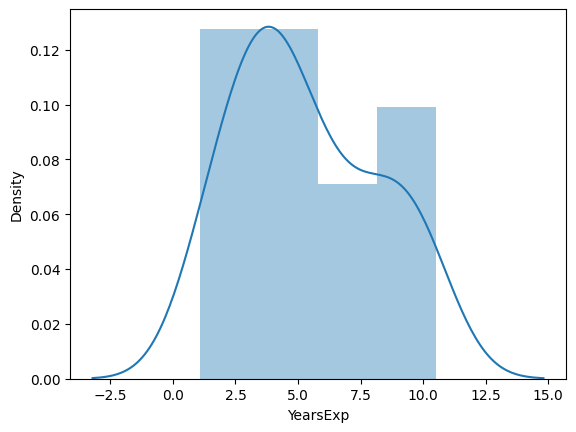

In [15]:
#Visualization
sns.distplot(df.YearsExp)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

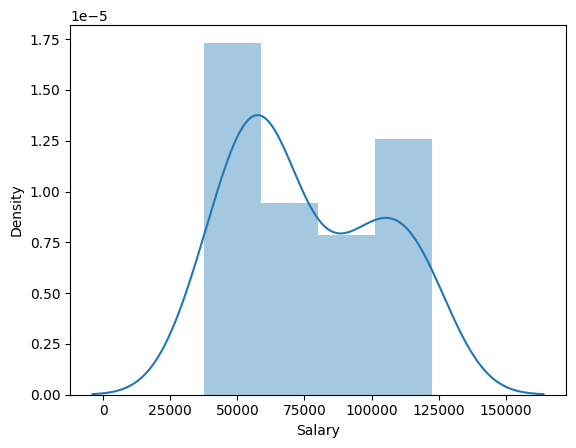

In [16]:
sns.distplot(df.Salary)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

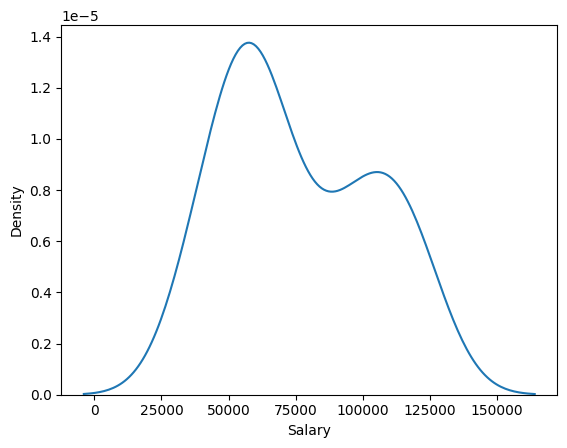

In [17]:
sns.kdeplot(df.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x24746a61d60>,
 'caps': [<matplotlib.lines.Line2D at 0x24746a71340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24746a61a90>],
 'medians': [<matplotlib.lines.Line2D at 0x24746a718e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24746a71e80>],
 'means': [<matplotlib.lines.Line2D at 0x24746a71bb0>]}

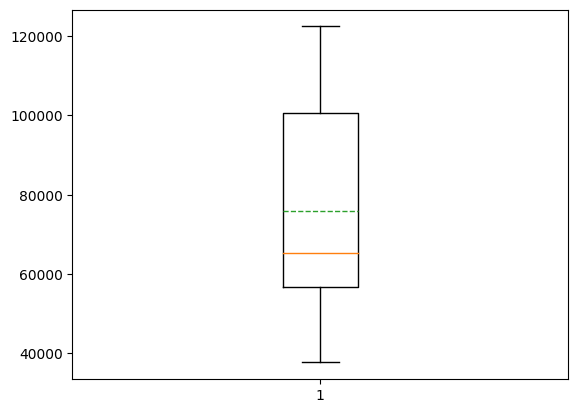

In [18]:
plt.boxplot(df["Salary"],showmeans=True,meanline=True)

In [19]:
np.median(df["Salary"])

65237.0

In [20]:
np.mean(df["Salary"]) #Mean>median>>>Right Skew

76003.0

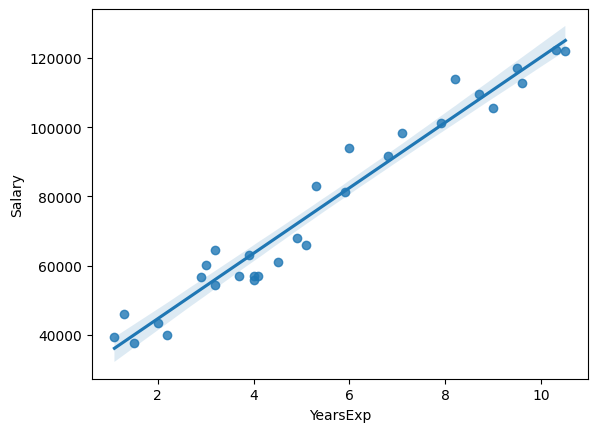

In [21]:
sns.regplot(x="YearsExp",y="Salary",data=df)
plt.show()

# *Correlation Analysis*

In [22]:

df.corr()

,YearsExp,Salary
YearsExp,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

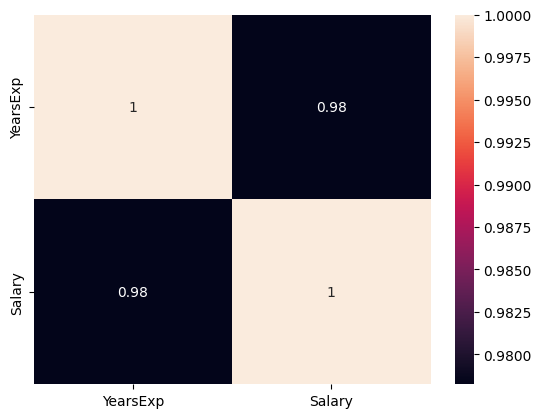

In [23]:
sns.heatmap(df.corr(),annot=True)

# *Model Building And Testing*

In [24]:
#Import Statsmodel
import statsmodels.formula.api as smf

In [25]:
#Fit the model
model=smf.ols("Salary~YearsExp",data=df).fit()
model

In [26]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        22:33:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params

Intercept    25792.200199
YearsExp      9449.962321
dtype: float64

In [28]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}\n")
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")  #slope(B1) and #intercept(Bo)

t value is
Intercept    11.346940
YearsExp     24.950094
dtype: float64
P value is
Intercept    5.511950e-12
YearsExp     1.143068e-20
dtype: float64

rsquared= 0.9569566641435086,
Adj.rsquared= 0.9554194021486339


In [29]:
#Go for transformation if skewness comes to your dataset
#build models with the help of types of transformations 
model1=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExp)",data=df).fit()
model1

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.58e-19
Time:                        22:33:24   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExp)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExp)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.37e-18
Time:                        22:33:24   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExp)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExp)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.40e-16
Time:                        22:33:24   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExp)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model1_pred =np.square(model1.predict(df['YearsExp']))
model2_pred =pow(model2.predict(df['YearsExp']),3)
model3_pred =np.exp(model3.predict(df['YearsExp']))

In [34]:
#Import Mean_square_error
from sklearn.metrics import mean_squared_error 

In [35]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred))


In [36]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174309 
model2= 6232.815455835842 
model3= 7219.716974372806


In [37]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# *Prediction*

In [38]:
# for better prediction model is suitable>>>bcz of high rsquared value compare to others & low rmse value
new=pd.Series([1.9,2.7])
new

0    1.9
1    2.7
dtype: float64

In [39]:
df1_pred=pd.DataFrame(new,columns=["YearsExp"])
df1_pred

,YearsExp
0,1.9
1,2.7


In [40]:
model.predict(df1_pred)

0    43747.128609
1    51307.098467
dtype: float64